/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


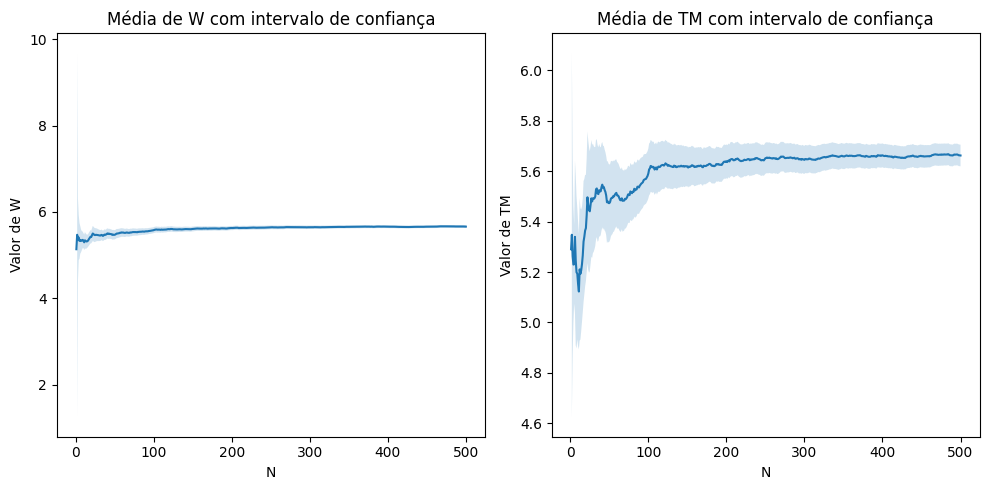

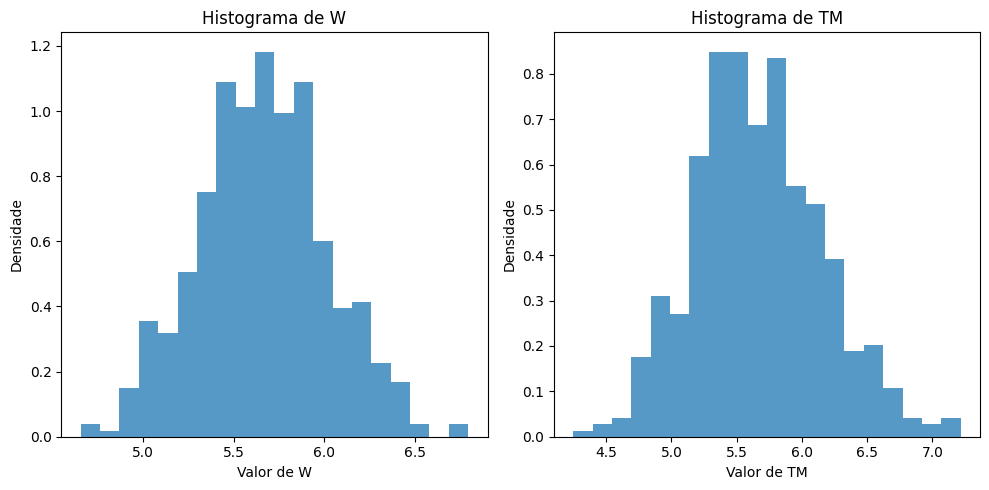

Médias finais: X_500 = 5.661119733357341, Y_500 = 5.662478160148436
P(tm > 13) = 0.0
Valor de ws para P(w > ws) < 5%: 6.257189975012009


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# Parâmetros do experimento
T = 50
n = 5
λ = 3
μ = 0.5
N = 500
se_threshold = 0.002

# Função para simulação de uma iteração
def simulate_iteration(λ, μ, n):
    arrivals = np.random.exponential(scale=1/λ, size=n)
    services = np.random.exponential(scale=1/μ, size=n)
    departure_times = np.cumsum(arrivals) + services
    return np.max(departure_times)

# Função para cálculo da média e intervalo de confiança
def calculate_mean_and_ci(data):
    mean = np.mean(data)
    se = np.std(data, ddof=1) / np.sqrt(len(data))
    ci = t.interval(0.95, len(data)-1, loc=mean, scale=se)
    return mean, ci

# Inicialização
N_values = []
W_means = []
W_cis = []
TM_means = []
TM_cis = []
W_values = []
TM_values = []

# Execução do experimento
for i in range(N):
    iteration_results = [simulate_iteration(λ, μ, n) for _ in range(T)]
    W = np.mean(iteration_results)
    TM = np.mean([np.mean(iteration_results[:k]) for k in range(1, T+1)])
    W_values.append(W)
    TM_values.append(TM)

    # Verifica se atingiu a condição de parada
    if i > 0:
        seW = np.std(W_values, ddof=1) / np.sqrt(i)
        if 2 * 1.96 * seW < se_threshold:
            break

    # Calcula média e intervalo de confiança para W e TM
    N_values.append(i+1)
    W_mean, W_ci = calculate_mean_and_ci(W_values)
    TM_mean, TM_ci = calculate_mean_and_ci(TM_values)
    W_means.append(W_mean)
    W_cis.append(W_ci)
    TM_means.append(TM_mean)
    TM_cis.append(TM_ci)

# Plotagem dos gráficos
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(N_values, W_means, label='Média de W')
plt.fill_between(N_values, np.array(W_cis)[:, 0], np.array(W_cis)[:, 1], alpha=0.2)
plt.xlabel('N')
plt.ylabel('Valor de W')
plt.title('Média de W com intervalo de confiança')

plt.subplot(1, 2, 2)
plt.plot(N_values, TM_means, label='Média de TM')
plt.fill_between(N_values, np.array(TM_cis)[:, 0], np.array(TM_cis)[:, 1], alpha=0.2)
plt.xlabel('N')
plt.ylabel('Valor de TM')
plt.title('Média de TM com intervalo de confiança')

plt.tight_layout()
plt.show()

# Histogramas de W e TM
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.hist(W_values, bins=20, density=True, alpha=0.75)
plt.xlabel('Valor de W')
plt.ylabel('Densidade')
plt.title('Histograma de W')

plt.subplot(1, 2, 2)
plt.hist(TM_values, bins=20, density=True, alpha=0.75)
plt.xlabel('Valor de TM')
plt.ylabel('Densidade')
plt.title('Histograma de TM')

plt.tight_layout()
plt.show()

# Médias finais e P(tm > 13)
final_iteration = len(W_values) - 1
print(f'Médias finais: X_{final_iteration+1} = {W_means[-1]}, Y_{final_iteration+1} = {TM_means[-1]}')
print(f'P(tm > 13) = {np.mean(np.array(TM_values) > 13)}')

# Cálculo de ws para P(w > ws) < 5%
ws = np.percentile(W_values, 95)
print(f'Valor de ws para P(w > ws) < 5%: {ws}')
